In [175]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(dir_path,'scripts'))

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls
import Evolvers as Evolvers

In [176]:
experiment = "Flensmon2D_6"

In [352]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

params_dict.update({"exp_path":exp_path})

I added a factor half to the cosines
No UE0s found, simulating and saving


100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Done


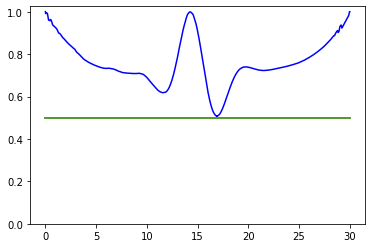

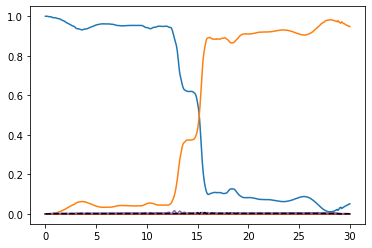

In [364]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)
importlib.reload(Evolvers)

class Flensmon(t.nn.Module, Systems.Periodic_System, Controls.ConstrainedPulse, Evolvers.ETrotter, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        self.alphas = obj.activation_func(None).detach()
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times),self.get_control())
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        # self.latest_matrix_exp = self.basis_change@t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp.flip(0)))

    def V_1d(self, alphas, control):
        return self.EJ*(-2*self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            + alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)
    
    def V_2d(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            - alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)

# obj = Flensmon(params_dict)
# # obj.plot_potential()
# obj.plot_activation_func()
# obj.plot_occupancy(indices=[_ for _ in range(5)])
obj2 = Flensmon(params_dict)
# obj.plot_potential()
obj2.plot_activation_func()
obj2.plot_occupancy(indices=[_ for _ in range(5)])

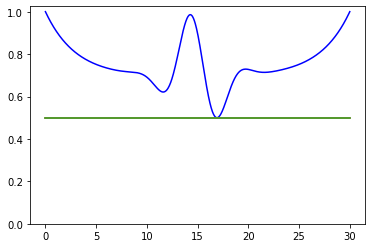

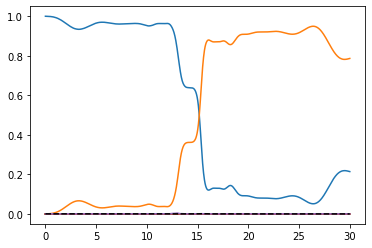

In [363]:
obj2.plot_activation_func()
obj2.plot_occupancy(indices=[_ for _ in range(5)])

In [362]:
obj2.stored_losses, obj.stored_losses[0]

(tensor([[0.9566]]),
 tensor([0.9288, 0.9288, 0.9243, 0.9193, 0.9139, 0.9078, 0.9010, 0.8932, 0.8841,
         0.8735, 0.8609, 0.8456, 0.8267, 0.8267, 0.8033, 0.7744, 0.7394, 0.6991,
         0.6557, 0.6128, 0.5733, 0.5389, 0.5098, 0.4853, 0.4646, 0.4646, 0.4471,
         0.4320, 0.4188, 0.4072, 0.3968, 0.3873, 0.3788, 0.3709, 0.3635, 0.3567,
         0.3503, 0.3503, 0.3442, 0.3384, 0.3330, 0.3277, 0.3227, 0.3179, 0.3132,
         0.3087, 0.3044, 0.3001, 0.2960, 0.2960, 0.2921, 0.2882, 0.2844, 0.2807,
         0.2771, 0.2736, 0.2701, 0.2667, 0.2634, 0.2602, 0.2570, 0.2570, 0.2539,
         0.2508, 0.2478, 0.2449, 0.2420, 0.2391, 0.2363, 0.2335, 0.2308, 0.2281,
         0.2254, 0.2254, 0.2228, 0.2203, 0.2178, 0.2153, 0.2128, 0.2104, 0.2080,
         0.2056, 0.2033, 0.2010, 0.1987, 0.1987, 0.1965, 0.1943, 0.1921, 0.1900,
         0.1878, 0.1857, 0.1837, 0.1816, 0.1796, 0.1776, 0.1756, 0.1756, 0.1737,
         0.1717, 0.1698, 0.1679, 0.1661, 0.1643, 0.1624, 0.1606, 0.1589, 0.1571,
       

In [357]:
obj2.stored_losses, obj.stored_losses[0][-1]

(tensor([[0.0610]]), tensor(0.0566))

In [344]:
obj.activation_func(None)

tensor([1.0000, 0.9912, 0.9912, 0.9914, 0.9932, 0.9937, 0.9922, 0.9886, 0.9800,
        0.9714, 0.9627, 0.9596, 0.9596, 0.9592, 0.9581, 0.9574, 0.9608, 0.9630,
        0.9610, 0.9582, 0.9552, 0.9514, 0.9455, 0.9407, 0.9373, 0.9351, 0.9338,
        0.9334, 0.9325, 0.9309, 0.9289, 0.9271, 0.9256, 0.9245, 0.9235, 0.9221,
        0.9204, 0.9185, 0.9162, 0.9137, 0.9107, 0.9070, 0.9031, 0.9004, 0.8991,
        0.8987, 0.8983, 0.8972, 0.8958, 0.8941, 0.8923, 0.8903, 0.8882, 0.8860,
        0.8834, 0.8809, 0.8788, 0.8774, 0.8762, 0.8750, 0.8736, 0.8721, 0.8705,
        0.8689, 0.8673, 0.8657, 0.8641, 0.8625, 0.8608, 0.8592, 0.8576, 0.8561,
        0.8546, 0.8531, 0.8515, 0.8500, 0.8485, 0.8471, 0.8458, 0.8446, 0.8434,
        0.8422, 0.8410, 0.8397, 0.8383, 0.8369, 0.8355, 0.8340, 0.8326, 0.8312,
        0.8299, 0.8287, 0.8276, 0.8265, 0.8255, 0.8244, 0.8233, 0.8220, 0.8190,
        0.8164, 0.8142, 0.8122, 0.8104, 0.8087, 0.8073, 0.8060, 0.8049, 0.8038,
        0.8026, 0.8013, 0.7999, 0.7985, 

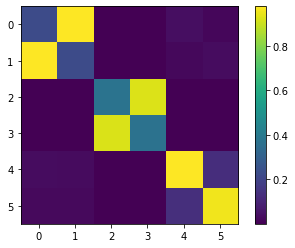

<Figure size 432x288 with 0 Axes>

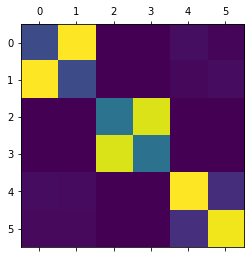

In [343]:
tmp = obj.eigvecs[:,[0,1,2,3,4,5]].adjoint()@obj.basis@obj().detach()@obj.basis.adjoint()@obj.eigvecs[:,[0,1,2,3,4,5]]
plt.imshow(tmp.abs())
plt.colorbar()

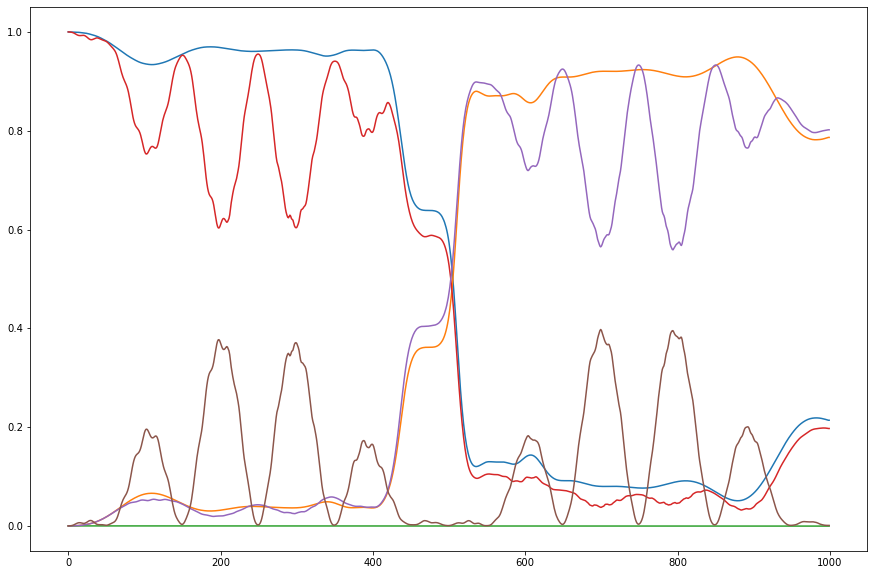

In [200]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(occ[[0,1,18],:,0].T)
ax.plot(tmp_occ[[0,1,2],:,0].T)

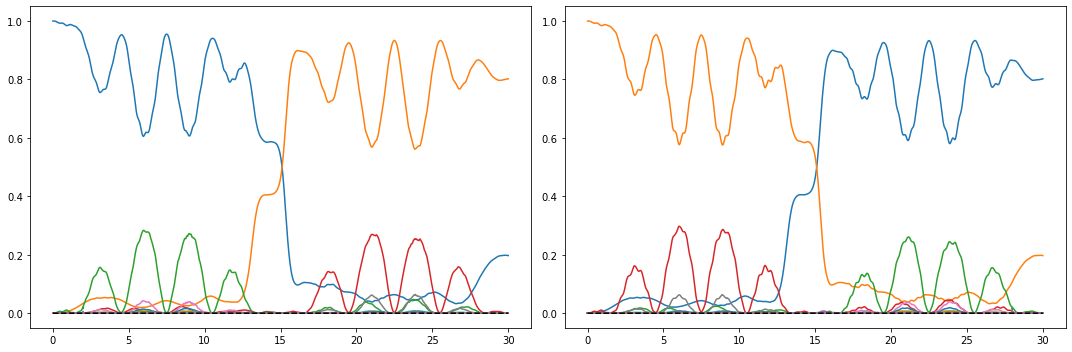

In [208]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj.times,occ[:-1,:,0].T)
ax[0].plot(obj.times,occ[-1,:,0],'k--')

ax[1].plot(obj.times,occ[:-1,:,1].T)
ax[1].plot(obj.times,occ[-1,:,1],'k--')
fig.tight_layout()

In [1650]:
# obj.test = lambda: print("lol")
# obj.get_control = lambda: t.load(os.path.join(obj.params_dict['exp_path'],"21_09_1607_pulse.pt"))
# obj.get_occupancy()
# obj()

In [339]:
obj.minimize(0.01,10)

initial loss: 0.03234249725937843
Ended at step: 188, with loss: 0.028358925133943558 and runtime: 12.772213220596313


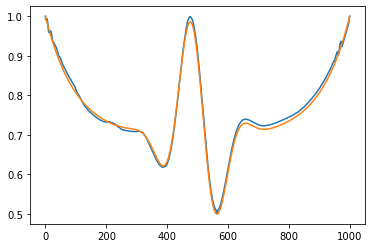

In [341]:
plt.plot(obj.activation_func(obj.times).detach())
plt.plot(obj.init_activation_func(obj.times))

c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,0].set(title="Initial Pulse",
c:\Users\jv97\github\Quantum-Optimal-Control\scripts\Plotting.py:86: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[0,2].set(title="Optimized Pulse",


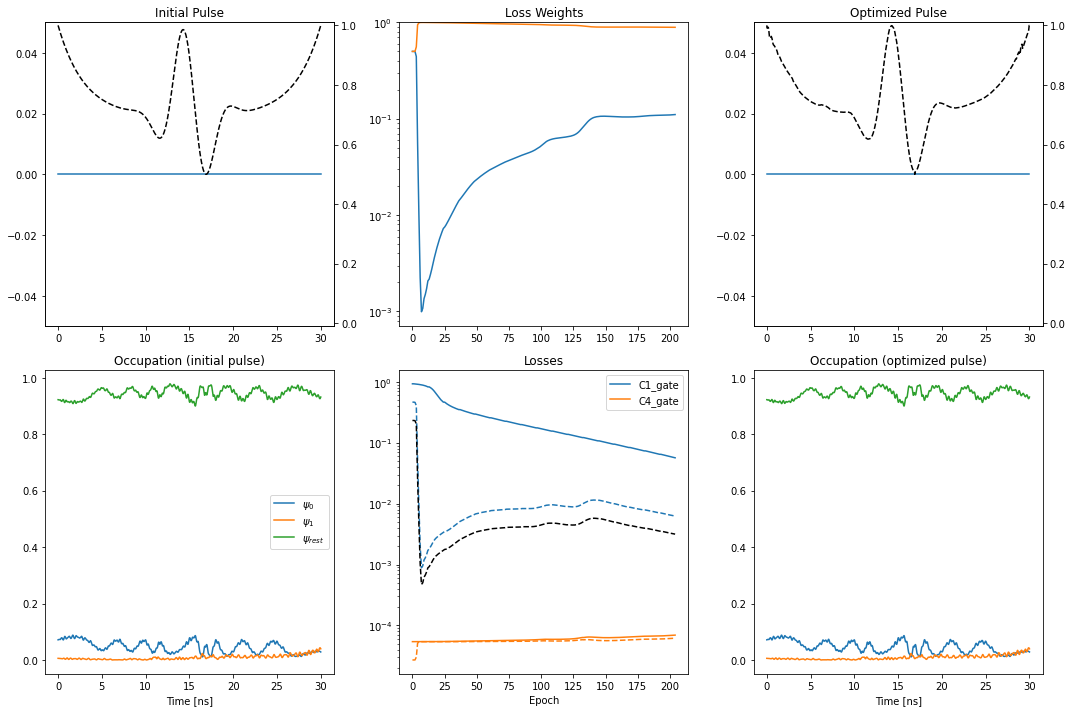

In [340]:
obj.plot_run(save=False,fig_name="ConstrainedPulse_XGate_0toPulse_withC7C8.pdf")

In [334]:
obj.stored_losses[0]

tensor([0.9288, 0.9288, 0.9243, 0.9193, 0.9139, 0.9078, 0.9010, 0.8932, 0.8841,
        0.8735, 0.8609, 0.8456, 0.8267, 0.8267, 0.8033, 0.7744, 0.7394, 0.6991,
        0.6557, 0.6128, 0.5733, 0.5389, 0.5098, 0.4853, 0.4646, 0.4646, 0.4471,
        0.4320, 0.4188, 0.4072, 0.3968, 0.3873, 0.3788, 0.3709, 0.3635, 0.3567,
        0.3503, 0.3503, 0.3442, 0.3384, 0.3330, 0.3277, 0.3227, 0.3179, 0.3132,
        0.3087, 0.3044, 0.3001, 0.2960, 0.2960, 0.2921, 0.2882, 0.2844, 0.2807,
        0.2771, 0.2736, 0.2701, 0.2667, 0.2634, 0.2602, 0.2570, 0.2570, 0.2539,
        0.2508, 0.2478, 0.2449, 0.2420, 0.2391, 0.2363, 0.2335, 0.2308, 0.2281,
        0.2254, 0.2254, 0.2228, 0.2203, 0.2178, 0.2153, 0.2128, 0.2104, 0.2080,
        0.2056, 0.2033, 0.2010, 0.1987, 0.1987, 0.1965, 0.1943, 0.1921, 0.1900,
        0.1878, 0.1857, 0.1837, 0.1816, 0.1796, 0.1776, 0.1756, 0.1756, 0.1737,
        0.1717, 0.1698, 0.1679, 0.1661, 0.1643, 0.1624, 0.1606, 0.1589, 0.1571,
        0.1554, 0.1554, 0.1537, 0.1520, 

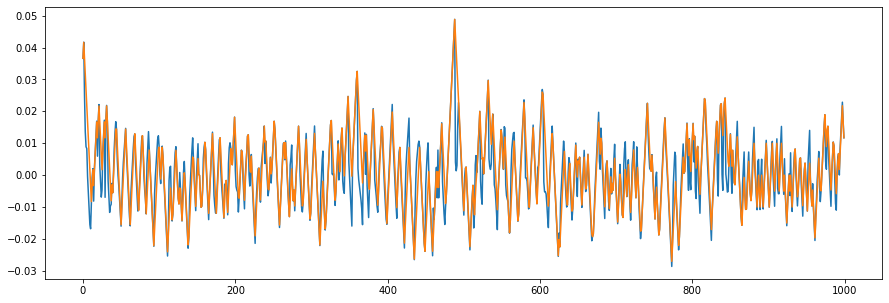

In [153]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(obj.heights.detach())
ax.plot(obj.get_control().detach())
# ax.set_xlim(0,100)

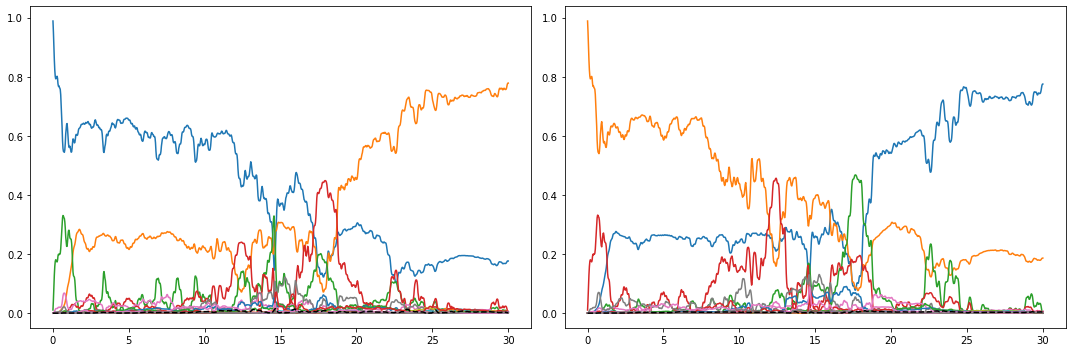

In [154]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
# for i in range(2):
occ = obj.get_occupancy([_ for _ in range(18)],[0,1]).detach()

ax[0].plot(obj.times,occ[:-1,:,0].T)
ax[0].plot(obj.times,occ[-1,:,0],'k--')

ax[1].plot(obj.times,occ[:-1,:,1].T)
ax[1].plot(obj.times,occ[-1,:,1],'k--')
fig.tight_layout()

In [139]:
U = obj()

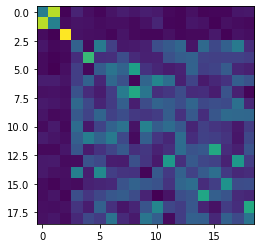

In [140]:
plt.imshow(U.abs().detach())

In [156]:
# t.save(pulse,os.path.join(obj.params_dict['exp_path'],"22_09_1435_pulse.pt"))

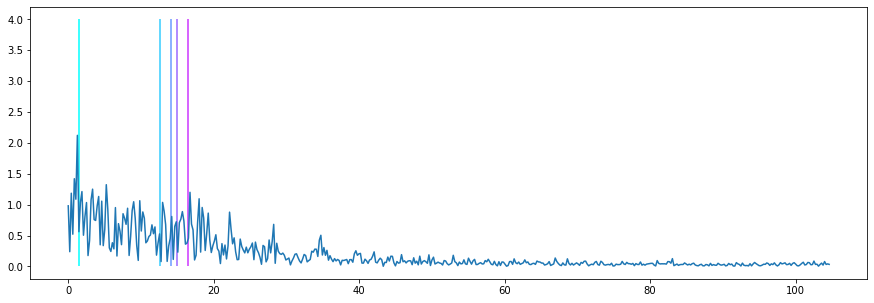

In [155]:
pulse = obj.get_control().detach().clone()
eigvals = obj.H0_term[500].real.diagonal()
energies = [eigvals[3]-eigvals[2],
            eigvals[2]-eigvals[1],
            eigvals[3]-eigvals[1],
            eigvals[2]-eigvals[0],
            eigvals[3]-eigvals[0]]


fft = t.fft.rfft(pulse)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1),fft.abs())
# ax.set_xlim(-1,20)
for i,E in enumerate(energies):
    ax.vlines(E,0,4,colors=(i/len(energies),1-i/len(energies),1))

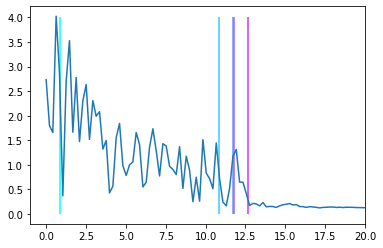

In [530]:
pulse = obj.get_control().detach().clone()
eigvals = obj.H0_term[0].real.diagonal()
energies = [eigvals[3]-eigvals[2],
            eigvals[2]-eigvals[1],
            eigvals[3]-eigvals[1],
            eigvals[2]-eigvals[0],
            eigvals[3]-eigvals[0]]


fft = t.fft.rfft(pulse)
fig, ax = plt.subplots()
ax.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1),fft.abs())
ax.set_xlim(-1,20)
for i,E in enumerate(energies):
    ax.vlines(E,0,4,colors=(i/len(energies),1-i/len(energies),1))